<a href="https://colab.research.google.com/github/Shweta-P-Singh/Micro_Analysis_Projects/blob/main/UK_Market_vs_FinTech_Sector_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install yfinance

In [10]:
import yfinance as yf
import pandas as pd

In [13]:
#define tickers and date range
tickers = ['^FTSE', 'WISE.L']
start_date = '2023-07-1'
end_date = '2023-07-31'
data = yf.download(tickers, start=start_date, end=end_date)
print(data.head())
print(data.columns)


/tmp/ipython-input-13-2927577862.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  2 of 2 completed

Price            Close                     High                      Low  \
Ticker          WISE.L        ^FTSE      WISE.L        ^FTSE      WISE.L   
Date                                                                       
2023-07-03  641.000000  7527.299805  652.799988  7561.299805  622.400024   
2023-07-04  641.599976  7519.700195  649.000000  7547.399902  636.911987   
2023-07-05  625.000000  7442.100098  648.799988  7519.700195  620.799988   
2023-07-06  606.799988  7280.500000  631.200012  7442.100098  604.799988   
2023-07-07  628.799988  7256.899902  631.000000  7280.500000  604.200012   

Price                          Open                Volume             
Ticker            ^FTSE      WISE.L        ^FTSE   WISE.L      ^FTSE  
Date                                                                  
2023-07-03  7513.899902  635.400024  7531.500000  1489805  533889900  
2023-07-04  7518.399902  641.799988  7527.299805   972620  664948700  
2023-07-05  7434.700195  637.200012 

In [14]:
close_prices = data['Close']

In [15]:
close_prices.rename(columns={'^FTSE': 'FTSE100'}, inplace=True)

/tmp/ipython-input-15-2973329959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices.rename(columns={'^FTSE': 'FTSE100'}, inplace=True)


In [16]:
print(close_prices.head())

Ticker          WISE.L      FTSE100
Date                               
2023-07-03  641.000000  7527.299805
2023-07-04  641.599976  7519.700195
2023-07-05  625.000000  7442.100098
2023-07-06  606.799988  7280.500000
2023-07-07  628.799988  7256.899902


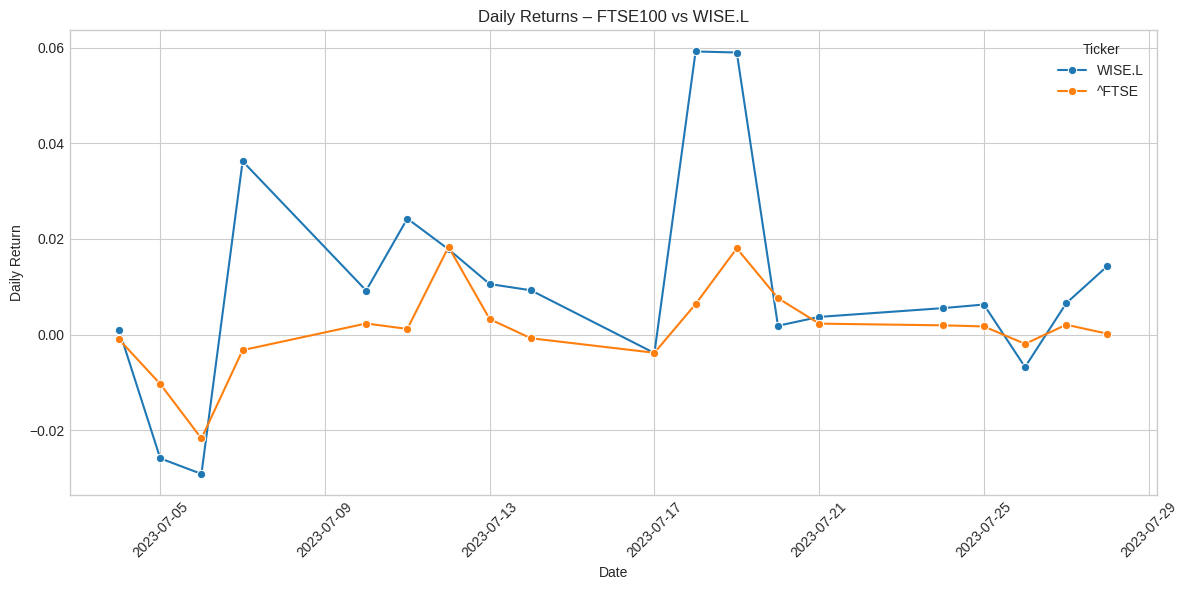

In [23]:
# Extract daily returns for Close prices only
daily_close_returns = daily_returns['Close']

# Reset index and melt for Seaborn
daily_close_returns = daily_close_returns.reset_index()
df_melted = daily_close_returns.melt(id_vars='Date', var_name='Ticker', value_name='Daily Return')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Date', y='Daily Return', hue='Ticker', marker='o')
plt.title('Daily Returns – FTSE100 vs WISE.L')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

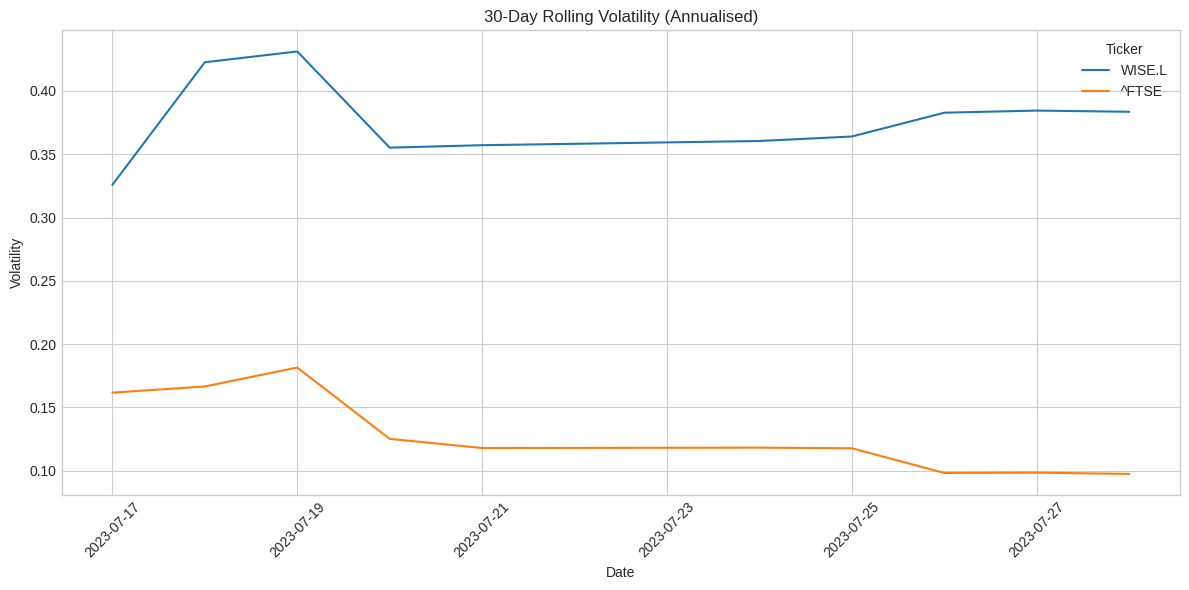

In [28]:
rolling_volatility = daily_returns['Close'].rolling(window=10).std() * (252**0.5)
vol_df = rolling_volatility.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Volatility')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=vol_df, x='Date', y='Volatility', hue='Ticker')
plt.title('30-Day Rolling Volatility (Annualised)')
plt.xticks(rotation=45)
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

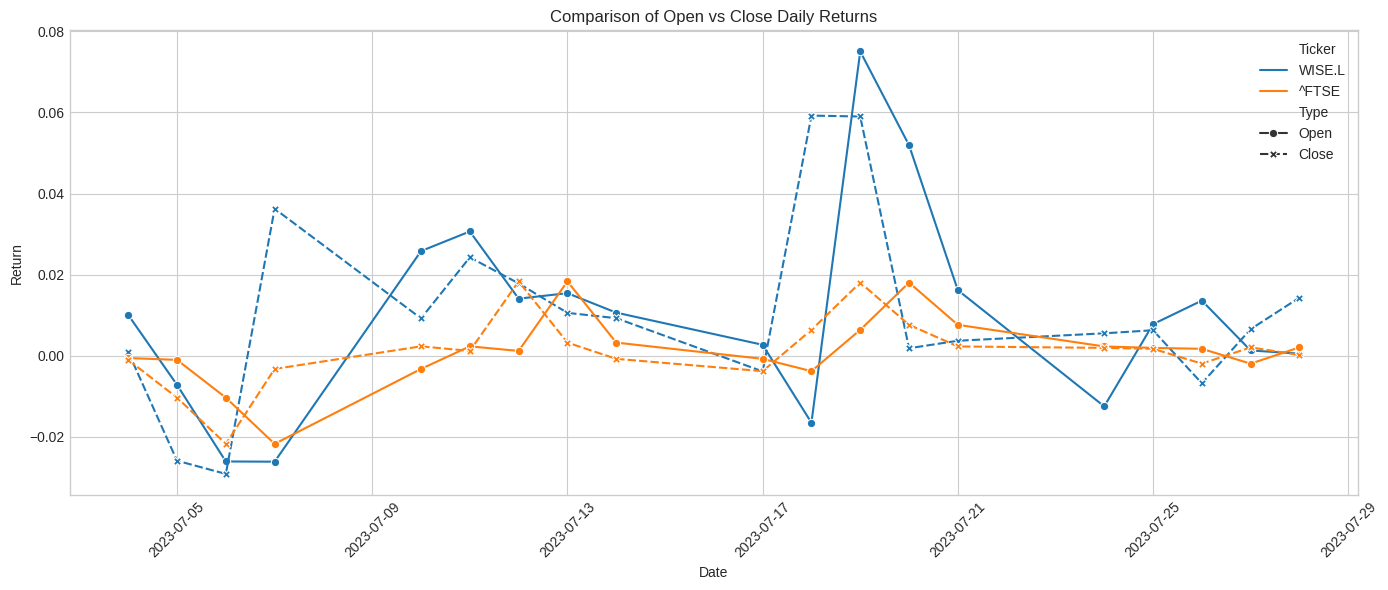

In [27]:
# Extract Open and Close prices
open_prices = data['Open']
close_prices = data['Close']

# Calculate returns
open_returns = open_prices.pct_change().dropna()
close_returns = close_prices.pct_change().dropna()

# Add 'Type' to identify each
open_df = open_returns.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Return')
open_df['Type'] = 'Open'

close_df = close_returns.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Return')
close_df['Type'] = 'Close'

# Combine both into one DataFrame
returns_df = pd.concat([open_df, close_df])

# Plot using Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=returns_df, x='Date', y='Return', hue='Ticker', style='Type', markers=True)
plt.title('Comparison of Open vs Close Daily Returns')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Key Findings
1. Daily Return Trends (Close Prices):
WISE.L shows significantly higher volatility in daily returns than FTSE100.
On specific days (e.g., around July 17–20), WISE.L experienced spikes nearing 6%, while FTSE100 remained under 2%.
FTSE100 is more stable, consistent with it being a broad market index.

2. Open vs Close Return Comparison:
WISE.L has greater divergence between Open and Close returns. This hints at overnight gaps possibly driven by news or sentiment.
FTSE100 shows tighter alignment between Open and Close returns, indicating lower intraday volatility.

3. 30-Day Rolling Volatility (Annualised):
WISE.L consistently exhibits 2–4x higher volatility than FTSE100 across the visible period.

Peaks at over 0.43 (43% annualised) on July 19.
FTSE100 volatility remains under 0.18, dropping as low as 0.098, indicating market stability.

These trends reinforce that:

WISE.L is a higher-risk, higher-reward stock, sensitive to market events.

FTSE100 is more resilient, suited for benchmarking or low-volatility portfolios.